# My Ordinary Least Squares Method (OLS) 

Vítor Gabriel Reis Caitité

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from math import *
from scipy import stats
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import KFold
from statsmodels.stats.outliers_influence import variance_inflation_factor
from prettytable import PrettyTable

## Dados

In [2]:
dataset = pd.read_csv('~/Documents/UFMG/Doutorado/materias/Modelos_de_Regressao/atividade_5/dataset.csv', header=0, sep=",", engine='python')
dataset = dataset.dropna()
# Selecionando as variáveis de ambiente requeridas:
y = pd.DataFrame(dataset["DEC_MED"].to_numpy().reshape(-1))
X = dataset.iloc[:, 5:138]
filter_col = [col for col in X if col.startswith('PC')]
for col in filter_col:
    X[col] = X[col].str.rstrip('%').astype(float)/100
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X))
X.head(5)

,0,1,2,3,4,5,6,7,8,9,...,123,124,125,126,127,128,129,130,131,132
0,0.399127,1.353253,1.362492,-0.578133,-0.596033,1.579121,1.305141,-0.915343,-0.113634,1.485218,...,-0.610017,-0.588413,1.109453,1.226116,-0.038737,-0.221704,-0.223991,-0.544598,0.176400,-0.614184
1,1.076901,3.014685,1.007583,-0.596562,-0.623505,1.518108,3.309969,-1.338659,-0.113634,1.085195,...,-0.909319,-0.045022,1.854659,0.693350,0.786875,-0.221779,-0.224081,-0.538422,0.144977,-0.164699
2,1.221315,3.951049,1.538246,-0.594579,-0.623989,2.602332,4.200094,-1.262436,-0.113634,2.118607,...,-0.800293,-0.278404,2.427251,1.077771,0.830667,-0.221871,-0.224456,-0.557961,0.042654,-0.511985
3,0.371145,0.219626,1.015313,-0.581581,-0.545845,-0.077650,0.287504,-1.143040,-0.113634,0.713739,...,-0.626224,0.166311,0.255024,-0.225542,0.264713,-0.221255,-0.220043,-0.400933,-0.233388,-0.189731
4,-0.402234,-0.653484,-0.216648,0.480299,0.497355,-0.745669,-0.609761,1.422006,-0.113634,-0.666743,...,0.686167,0.427887,-0.779568,-1.298523,0.040313,-0.107266,-0.104986,0.314178,-0.314515,0.722924


## Selecionando Variáveis

### Remoção de Multicolinearidade com VIF

O objetivo agora é identificar e excluir variáveis preditoras que estão fortemente correlacionadas com outras variáveis no conjunto de dados. A multicolinearidade pode ser identificada usando métricas como o Fator de Inflação da Variância (VIF) ou a matriz de correlação. A estratégia aqui será remover todas as variáveis que possuírem VIF maior que 10. Sendo:

$$VIF_i = \frac{1}{1-R_i^2}$$


In [3]:
# Função responsável por calcular o VIF para cada coluna do DataFrame X:
def calculate_vif(X):
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    with np.errstate(divide='ignore'):
        vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data

# Função responsável por remover colunas com VIF maior que o limite especificado (threshold):
def remove_multicollinearity(X, threshold=10):
    while True:
        # Calcular VIF
        vif_data = calculate_vif(X)
        max_vif = vif_data["VIF"].max()
        
        if max_vif > threshold:
            # Remover a variável com o maior VIF
            drop_feature = vif_data.loc[vif_data["VIF"].idxmax(), "feature"]
            print(f"Removendo '{drop_feature}' com VIF = {max_vif:.2f}")
            X = X.drop(columns=[drop_feature])
        else:
            break
    return X

X = remove_multicollinearity(X, threshold=10)

Removendo '8' com VIF = inf
Removendo '11' com VIF = inf
Removendo '14' com VIF = inf
Removendo '26' com VIF = inf
Removendo '27' com VIF = inf
Removendo '28' com VIF = inf
Removendo '29' com VIF = inf
Removendo '30' com VIF = inf
Removendo '31' com VIF = inf
Removendo '32' com VIF = inf
Removendo '33' com VIF = inf
Removendo '46' com VIF = inf
Removendo '53' com VIF = inf
Removendo '56' com VIF = inf
Removendo '63' com VIF = inf
Removendo '68' com VIF = inf
Removendo '69' com VIF = inf
Removendo '84' com VIF = inf
Removendo '85' com VIF = inf
Removendo '90' com VIF = inf
Removendo '95' com VIF = inf
Removendo '105' com VIF = inf
Removendo '110' com VIF = inf
Removendo '115' com VIF = inf
Removendo '124' com VIF = inf
Removendo '129' com VIF = 112570.09
Removendo '120' com VIF = 34090.99
Removendo '13' com VIF = 25185.60
Removendo '16' com VIF = 13232.40
Removendo '10' com VIF = 10692.96
Removendo '77' com VIF = 10055.12
Removendo '51' com VIF = 7936.08
Removendo '99' com VIF = 6735.16

## Modelo de Regressão Linear Múltipla utilizando o pacote "scipy.stats"

In [34]:
X_ = sm.add_constant(X)
model = sm.OLS(np.log(y), X_)
results = model.fit() 
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     66.66
Date:                Thu, 21 Nov 2024   Prob (F-statistic):               0.00
Time:                        03:30:52   Log-Likelihood:                -1093.6
No. Observations:                1856   AIC:                             2309.
Df Residuals:                    1795   BIC:                             2646.
Df Model:                          60                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.6572      0.010    258.104      0.0

# Modelo de Regressão Linear Múltipla utilizando implementação própria

In [53]:
class OLS:
    def __init__(self, add_intercept=True):
        self.beta = None
        self.residuals = None
        self.r_squared = None
        self.residual_std = None
        self.t_values = None
        self.p_values = None
        self.names = None
        self.f_statistic = None
        self.add_intercept = add_intercept
    
    def fit(self, X, y):
        if self.add_intercept:
            # Add intercept
            X.insert(loc=0, column='const', value=1)

        y = y.to_numpy().flatten()

        # Saving variable names:
        self.names = list(X.columns.values)
            
        # Calculating Beta: 
        self.beta = np.linalg.pinv(X.T @ X) @ X.T @ y
        # Computing residuals:
        y_hat = X.to_numpy() @ self.beta
        self.residuals = y - y_hat

        # Computing R-squared:
        SSE = np.sum(self.residuals**2)
        SST = np.sum((y - np.mean(y))**2)
        self.r_squared = 1 - SSE / SST

        # Computing Residual Standard Deviation:
        n, p = X.shape
        self.residual_std = np.sqrt(SSE / (n - p))

        # Computing the standard deviation of the coefficients:
        sigma2 = SSE / (n - p)
        cov_beta = sigma2 * np.linalg.pinv(X.T @ X) 
        self.beta_std = np.sqrt(np.diag(cov_beta))
        
        # Computing P-values:
        self.t_values = self.beta/self.beta_std
        self.p_values = [2 * (1 - stats.t.cdf(np.abs(t), df=n - p)) for t in self.t_values]

        # Computing F-statistic:
        SSR = np.sum((y_hat - np.mean(y))**2)
        self.f_statistic = (SSR / (p - 1)) / (SSE / (n - p))

    def predict(self, X):
        if self.add_intercept:
            # Add intercept
            X.insert(loc=0, column='const', value=1)
        return X.to_numpy() @ self.beta
    
    def summary(self):
        results = PrettyTable()
        results.add_column('Name', self.names)
        results.add_column('Coef', round(self.beta, 3))
        results.add_column('Std Coef', np.round(self.beta_std, 3))
        results.add_column('t', np.round(self.t_values, 3))
        results.add_column('P>|t|', np.round(self.p_values, 3))
        print(results)
        print(f"R-squared: {self.r_squared:.4f}")
        print(f"F-statistic: {self.f_statistic:.4f}")


In [54]:
y =dataset["DEC_MED"]
model = OLS(add_intercept=0)
results = model.fit(X, pd.DataFrame(np.log(y)))
model.summary()

+-------+--------+----------+---------+-------+
|  Name |  Coef  | Std Coef |    t    | P>|t| |
+-------+--------+----------+---------+-------+
| const | 2.657  |   0.01   | 258.104 |  0.0  |
|   2   | 0.026  |  0.025   |  1.048  | 0.295 |
|   3   | 0.043  |  0.031   |  1.392  | 0.164 |
|   7   | 0.057  |  0.026   |  2.173  |  0.03 |
|   12  |  0.02  |  0.021   |  0.936  | 0.349 |
|   15  |  0.0   |  0.018   |  0.022  | 0.982 |
|   17  | -0.009 |  0.017   |  -0.548 | 0.584 |
|   18  | -0.004 |  0.025   |  -0.147 | 0.883 |
|   19  | -0.003 |  0.014   |  -0.228 | 0.819 |
|   21  | -0.003 |  0.015   |  -0.202 |  0.84 |
|   23  | -0.014 |  0.015   |  -0.975 |  0.33 |
|   24  |  0.26  |  0.016   |  16.299 |  0.0  |
|   34  | -0.047 |   0.03   |  -1.572 | 0.116 |
|   35  | -0.014 |  0.024   |  -0.572 | 0.567 |
|   36  | 0.024  |   0.02   |  1.197  | 0.232 |
|   40  | -0.002 |  0.017   |  -0.091 | 0.927 |
|   41  | 0.246  |   0.03   |  8.168  |  0.0  |
|   42  | 0.025  |   0.03   |  0.843  | 

#### Actual vs. Predicted Values



Este gráfico ajuda a visualizar o quão bem as previsões do modelo se alinham com os valores reais.

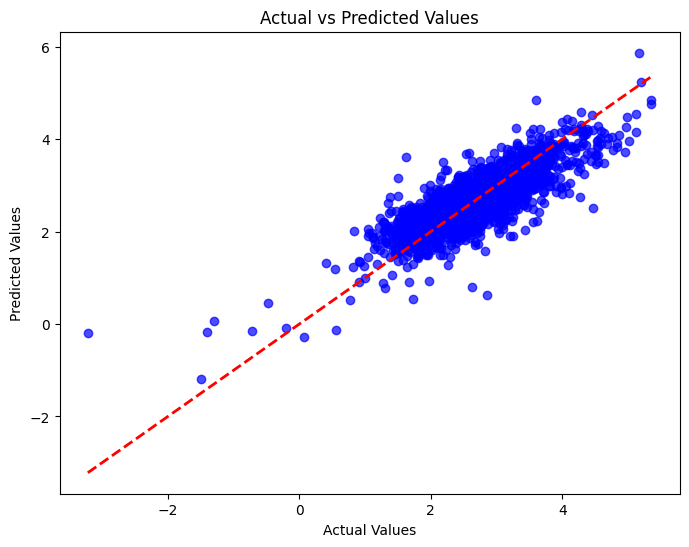

In [55]:
# Predictions
y_pred = model.predict(X)

# Plot actual vs. predicted
plt.figure(figsize=(8, 6))
plt.scatter(np.log(y), y_pred, alpha=0.7, color="blue")
plt.plot([np.log(y).min(), np.log(y).max()], [np.log(y).min(), np.log(y).max()], color="red", linestyle="--", linewidth=2)
plt.title("Actual vs Predicted Values")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.show()


#### Coefficient Importance (Feature Weights)



A intenção do plot abaixo é observar a importância de cada coeficiente do nosso modelo. Ele exibe os coeficientes associados às variáveis preditoras ($Xi$) do modelo, indicando sua contribuição relativa para o resultado ($y$).

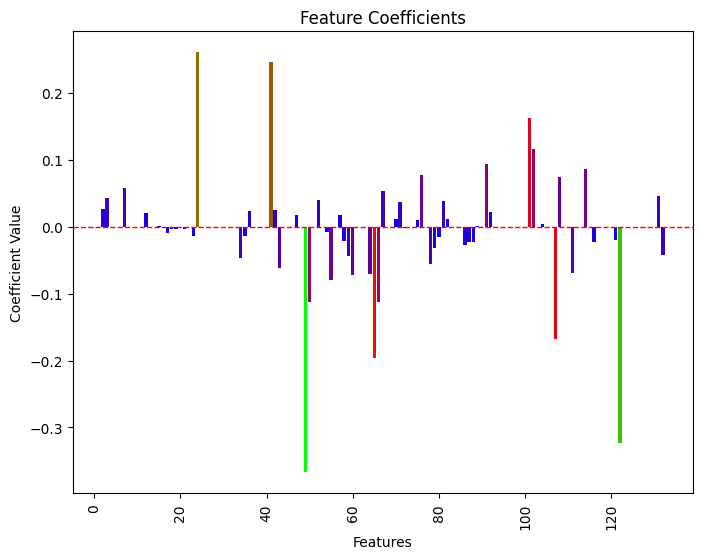

In [56]:
coefficients = model.beta[1:]  # Exclude the intercept
features = X.columns[1:]  # Exclude the constant term

# Define colors based on magnitude
colors = coefficients.abs()  
colors = colors/colors.max()  

# Plot coefficients
plt.figure(figsize=(8, 6))
bars = plt.bar(features, coefficients, color=plt.cm.brg(colors))
plt.axhline(0, color="red", linestyle="--", linewidth=1)
plt.title("Feature Coefficients")
plt.xlabel("Features")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=90)
plt.show()

#### Gráfico quantil-quantil



Esse gráfico busca comparar duas distribuições de probabilidade, traçando seus quantis uns contra os outros. e as duas distribuições que estão sendo comparadas são semelhantes, os pontos no gráfico Q-Q vão repousar aproximadamente na linha y = x. O gráfico q-q pode ser usado para verificar se os resíduos apresentam distribuição normal. 

Quando os pontos de um QQ plot caem sobre a linha de 45º, isso significa que os dados observados seguem aproximadamente a distribuição de referência.

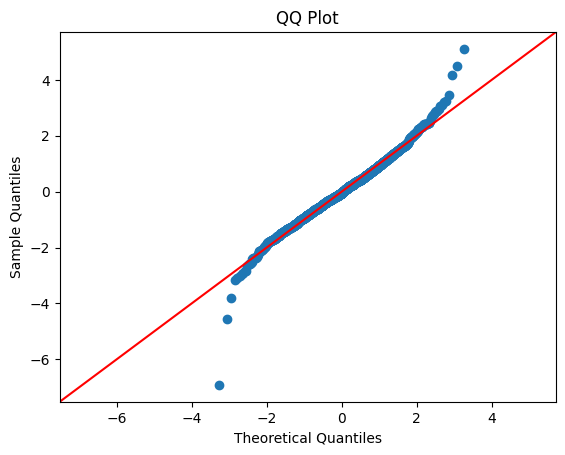

In [57]:
# QQ plot
residuals = np.log(y) - y_pred
sm.qqplot(residuals, line='45', fit=True)
plt.title("QQ Plot")
plt.show()

Observando o gráfico acima podemos inferir que os resíduos do modelo são aproximadamente normais, o que é uma suposição fundamental da regressão linear.